<a href="https://colab.research.google.com/github/GV2410/DWP-TECH-LAB/blob/main/DWP_5_Support_vector_Machihne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv')
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


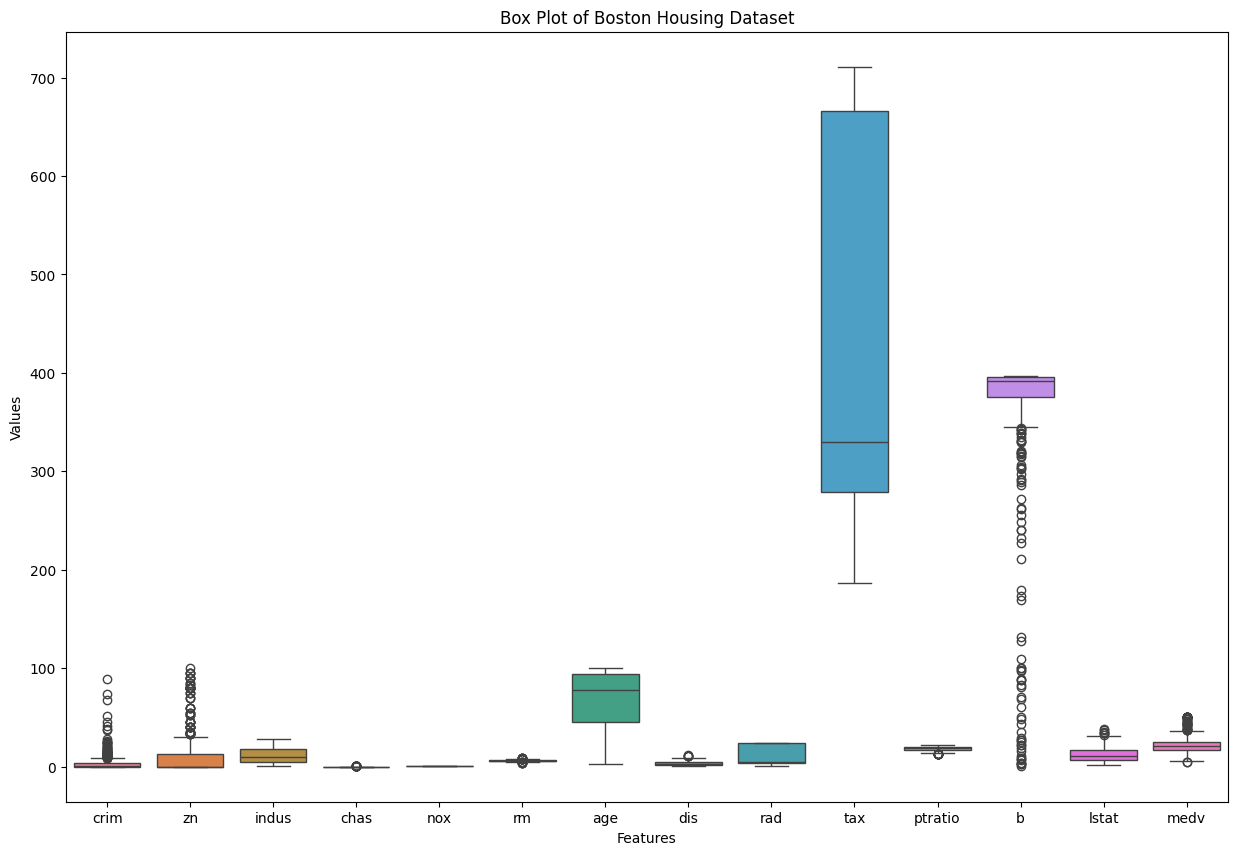

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Box Plot of Boston Housing Dataset')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv')

def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=np.number):  # Iterate only over numerical columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# The function name was changed from find_outliers_iqr to detect_outliers_iqr
outliers = detect_outliers_iqr(df)

for col, outlier_df in outliers.items():
    print(f"Outliers in {col}:\n{outlier_df}")
    print(f"Q1 for {col}: {df[col].quantile(0.25)}")
    print(f"Q2 (median) for {col}: {df[col].quantile(0.5)}")
    print(f"Q3 for {col}: {df[col].quantile(0.75)}")
    print(f"IQR for {col}: {df[col].quantile(0.75) - df[col].quantile(0.25)}\n")


Outliers in crim:
        crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
367  13.5222  0.0   18.1     0  0.631  3.863  100.0  1.5106   24  666   
371   9.2323  0.0   18.1     0  0.631  6.216  100.0  1.1691   24  666   
373  11.1081  0.0   18.1     0  0.668  4.906  100.0  1.1742   24  666   
374  18.4982  0.0   18.1     0  0.668  4.138  100.0  1.1370   24  666   
375  19.6091  0.0   18.1     0  0.671  7.313   97.9  1.3163   24  666   
..       ...  ...    ...   ...    ...    ...    ...     ...  ...  ...   
468  15.5757  0.0   18.1     0  0.580  5.926   71.0  2.9084   24  666   
469  13.0751  0.0   18.1     0  0.580  5.713   56.7  2.8237   24  666   
477  15.0234  0.0   18.1     0  0.614  5.304   97.3  2.1007   24  666   
478  10.2330  0.0   18.1     0  0.614  6.185   96.7  2.1705   24  666   
479  14.3337  0.0   18.1     0  0.614  6.229   88.0  1.9512   24  666   

     ptratio       b  lstat  medv  
367     20.2  131.42  13.33  23.1  
371     20.2  366.15   9.53  50.0

In [ ]:

outlier_counts = {}
for col, outlier_df in outliers.items():
    outlier_counts[col] = len(outlier_df)

for col, count in outlier_counts.items():
    print(f"Number of outliers in {col}: {count}")

Number of outliers in crim: 66
Number of outliers in zn: 68
Number of outliers in indus: 0
Number of outliers in chas: 35
Number of outliers in nox: 0
Number of outliers in rm: 30
Number of outliers in age: 0
Number of outliers in dis: 5
Number of outliers in rad: 0
Number of outliers in tax: 0
Number of outliers in ptratio: 15
Number of outliers in b: 77
Number of outliers in lstat: 7
Number of outliers in medv: 40


In [ ]:

import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv')

def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=np.number):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

outliers = detect_outliers_iqr(df)

for col, outlier_df in outliers.items():
    if not outlier_df.empty:
      print(f"Outliers detected in {col}: True")
    else:
      print(f"Outliers detected in {col}: False")

Outliers detected in crim: True
Outliers detected in zn: True
Outliers detected in indus: False
Outliers detected in chas: True
Outliers detected in nox: False
Outliers detected in rm: True
Outliers detected in age: False
Outliers detected in dis: True
Outliers detected in rad: False
Outliers detected in tax: False
Outliers detected in ptratio: True
Outliers detected in b: True
Outliers detected in lstat: True
Outliers detected in medv: True


In [ ]:
median_value = df[col].median
print(median_value)

<bound method Series.median of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64>


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv')

def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=np.number):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index # Get the index of outliers
    return outliers

outliers = detect_outliers_iqr(df)

# Iterate over columns and replace outliers with the median
for col in df.select_dtypes(include=np.number):
    median_value = df[col].median()  # Calculate median for the current column
    # Use the outlier indices to replace values in df
    df.loc[outliers[col], col] = median_value
    print(df.loc[outliers[col], col])

367    0.25651
371    0.25651
373    0.25651
374    0.25651
375    0.25651
        ...   
468    0.25651
469    0.25651
477    0.25651
478    0.25651
479    0.25651
Name: crim, Length: 66, dtype: float64
39     0.0
40     0.0
54     0.0
55     0.0
56     0.0
      ... 
351    0.0
352    0.0
353    0.0
354    0.0
355    0.0
Name: zn, Length: 68, dtype: float64
Series([], Name: indus, dtype: float64)
142    0
152    0
154    0
155    0
160    0
162    0
163    0
208    0
209    0
210    0
211    0
212    0
216    0
218    0
219    0
220    0
221    0
222    0
234    0
236    0
269    0
273    0
274    0
276    0
277    0
282    0
283    0
356    0
357    0
358    0
363    0
364    0
369    0
370    0
372    0
Name: chas, dtype: int64
Series([], Name: nox, dtype: float64)
97     6.2085
98     6.2085
162    6.2085
163    6.2085
166    6.2085
180    6.2085
186    6.2085
195    6.2085
203    6.2085
204    6.2085
224    6.2085
225    6.2085
226    6.2085
232    6.2085
233    6.2085
253    6.2

In [ ]:
#find where the outliers were replaced
outlier_indices = np.where(Outlier_mask)
outlier_location = list(zip(np.where(Outlier_mask)[0], np.where(Outlier_mask)[1]))
print(outlier_indices)
print(outlier_location)

NameError: name 'Outlier_mask' is not defined